In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

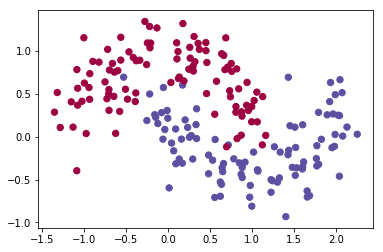

In [2]:
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [3]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

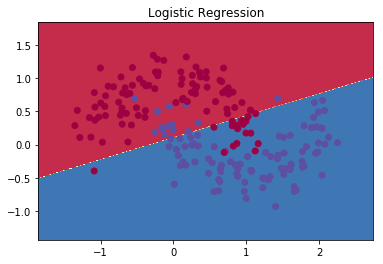

In [5]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [6]:
class NN(object):
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.W1 = np.random.randn(self.hidden_dim, self.input_dim) / np.sqrt(self.input_dim)
        self.b1 = np.zeros((1, self.hidden_dim))
        self.W2 = np.random.randn(self.output_dim, self.hidden_dim) / np.sqrt(self.hidden_dim)
        self.b2 = np.zeros((1, self.output_dim))
        
        self.reg = 1e-5
        pass
    
    def train(self, X, y):
        num_iter = 100000
        learning_rate = 3e-2
        for i in range(num_iter):
            grad, loss = self.loss(X,y)
            self.W1 += -learning_rate * grad['W1']
            self.b1 += -learning_rate * grad['b1']
            self.W2 += -learning_rate * grad['W2']
            self.b2 += -learning_rate * grad['b2']
            if i % 1000 == 0:
                print ("iter {0} : loss {1}".format(i, loss))
        pass
    
    def predict(self, X):
        z1 = np.dot(X, self.W1.T) + self.b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1, self.W2.T) + self.b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        y = np.argmax(probs, axis=1)
        return y
    
    def loss(self, X, y):
        N,D = X.shape
        
        #forward propagation
        z1 = np.dot(X, self.W1.T) + self.b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1, self.W2.T) + self.b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        a2 = probs
        
        loss = np.sum( -np.log(probs[np.arange(N), y])) / N
        loss += self.reg / 2 * (np.sum(self.W1 * self.W1) + np.sum(self.W2 * self.W2))
        #loss /= N
        
        #backward propagation
        delta2 = probs
        delta2[np.arange(N), y] -= 1
        dW2 = np.dot(delta2.T, a1) / N
        db2 = np.sum(delta2, axis=0, keepdims=True) / N
        
        delta1 = (1 - a1*a1) * np.dot(delta2, self.W2)
        dW1 = np.dot(delta1.T, X) / N
        db1 = np.sum(delta1, axis=0, keepdims=True) / N
        
        dW1 += self.reg * self.W1
        dW2 += self.reg * self.W2
        
        grad = {}
        grad['W1'] = dW1
        grad['b1'] = db1
        grad['W2'] = dW2
        grad['b2'] = db2
        return grad, loss

#### 注意几点
- 计算梯度时，需要注意是所有样本的梯度和，然后再除以样本数量。
- data loss项除以样本数量，regularized不除以。梯度必须除以样本数量。

#### reference
1. http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/

In [7]:
nn = NN(2, 4, 2)
nn.train(X, y)

iter 0 : loss 0.64398880907
iter 1000 : loss 0.296004970719
iter 2000 : loss 0.270084275735
iter 3000 : loss 0.2296367359
iter 4000 : loss 0.19486510827
iter 5000 : loss 0.169622376427
iter 6000 : loss 0.151837226633
iter 7000 : loss 0.138930012468
iter 8000 : loss 0.128843455959
iter 9000 : loss 0.119784596021
iter 10000 : loss 0.110142477778
iter 11000 : loss 0.100260857687
iter 12000 : loss 0.0918610180716
iter 13000 : loss 0.0852731432702
iter 14000 : loss 0.0802003844162
iter 15000 : loss 0.0763354276475
iter 16000 : loss 0.0733856130809
iter 17000 : loss 0.0710987408446
iter 18000 : loss 0.0692846229644
iter 19000 : loss 0.067810437003
iter 20000 : loss 0.0665857893243
iter 21000 : loss 0.0655489272567
iter 22000 : loss 0.0646568911134
iter 23000 : loss 0.0638790756062
iter 24000 : loss 0.0631931294067
iter 25000 : loss 0.0625823400465
iter 26000 : loss 0.0620339415566
iter 27000 : loss 0.0615379962205
iter 28000 : loss 0.0610866383077
iter 29000 : loss 0.0606735504808
iter 30000

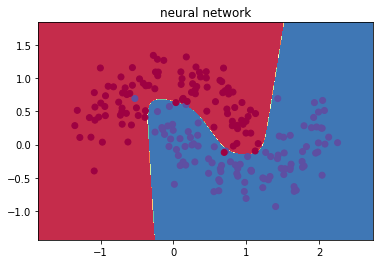

In [8]:
plot_decision_boundary(lambda x: nn.predict(x))
plt.title("neural network")

#### 更完整的代码如下，只考虑两层的网络：

In [9]:
class NN(object):
    def __init__(self, input_dim, hidden_dim, output_dim, lr=1e-2, reg=1e-5):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.W1 = np.random.randn(self.hidden_dim, self.input_dim) / np.sqrt(self.input_dim)
        self.b1 = np.zeros((1, self.hidden_dim))
        self.W2 = np.random.randn(self.output_dim, self.hidden_dim) / np.sqrt(self.hidden_dim)
        self.b2 = np.zeros((1, self.output_dim))
        
        self.lr = lr
        self.reg = reg
        pass
    
    def train(self, X, y, num_iter=100000, verbose=True):
        for i in range(num_iter):
            grad, loss = self.loss(X,y)
            self.W1 += -self.lr * grad['W1']
            self.b1 += -self.lr * grad['b1']
            self.W2 += -self.lr * grad['W2']
            self.b2 += -self.lr * grad['b2']
            if i % 1000 == 0 and verbose:
                print ("iter {0} : loss {1}".format(i, loss))
        pass
    
    def predict(self, X):
        z1 = np.dot(X, self.W1.T) + self.b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1, self.W2.T) + self.b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        y = np.argmax(probs, axis=1)
        return y
    
    def loss(self, X, y):
        N,D = X.shape
        
        #forward propagation
        z1 = np.dot(X, self.W1.T) + self.b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1, self.W2.T) + self.b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        a2 = probs
        
        loss = np.sum( -np.log(probs[np.arange(N), y])) / N
        loss += self.reg / 2 * (np.sum(self.W1 * self.W1) + np.sum(self.W2 * self.W2))
        
        #backward propagation
        delta2 = probs
        delta2[np.arange(N), y] -= 1
        dW2 = np.dot(delta2.T, a1) / N
        db2 = np.sum(delta2, axis=0, keepdims=True) / N
        
        delta1 = (1 - a1*a1) * np.dot(delta2, self.W2)
        dW1 = np.dot(delta1.T, X) / N
        db1 = np.sum(delta1, axis=0, keepdims=True) / N
        
        dW1 += self.reg * self.W1
        dW2 += self.reg * self.W2
        
        grad = {}
        grad['W1'] = dW1
        grad['b1'] = db1
        grad['W2'] = dW2
        grad['b2'] = db2
        return grad, loss

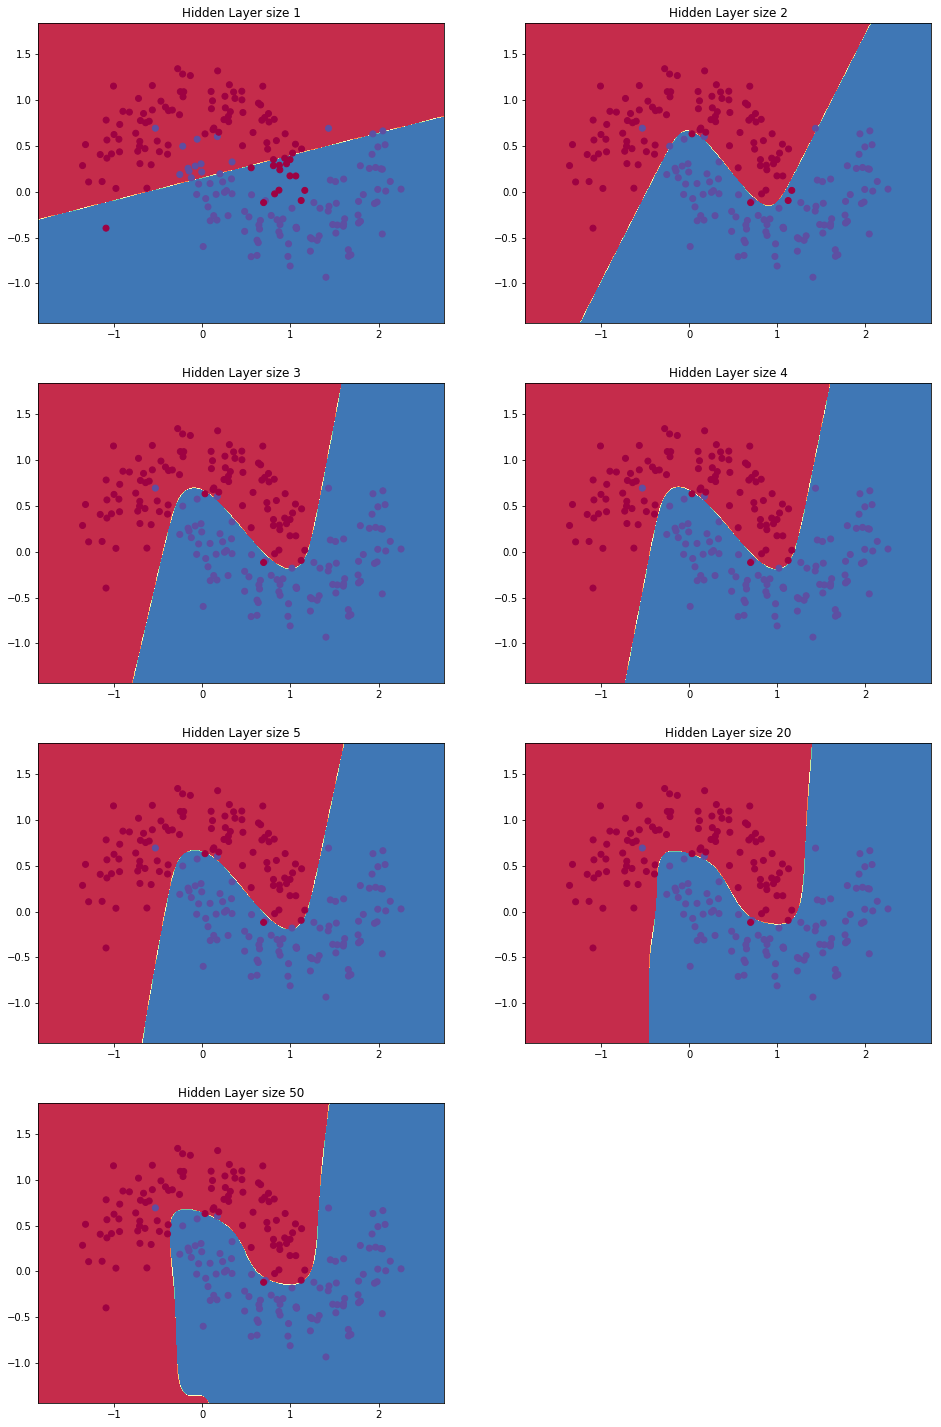

In [10]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    nn = NN(2, nn_hdim, 2)
    nn.train(X, y, verbose=False)
    plot_decision_boundary(lambda x: nn.predict(x))
plt.show()